In [1]:
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [2]:
#Import data sets
train = pd.read_csv('train.csv.gz', compression='gzip')
test =  pd.read_csv('test.csv.gz', compression='gzip')

train_copy = train
test_copy = test

train = train.drop(['Id'],axis=1)
test = test.drop(['Id'],axis=1)
y = train['SalePrice']

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***Columns***
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pa

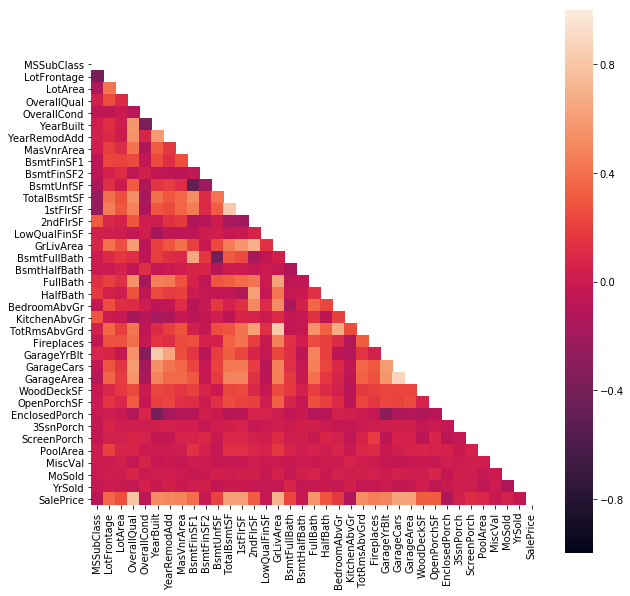

In [3]:
#Groups the input data by dtype
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])
train_obj = train.select_dtypes(include=['O'])

test_float = test.select_dtypes(include=['float64'])
test_int = test.select_dtypes(include=['int64'])
test_obj = test.select_dtypes(include=['O'])

#Groups numeric input data
#train_num = pd.concat([train_int, train_float], axis=1)
#test_num = pd.concat([test_int, test_float], axis=1)

#Creates missing category fields
train_nan = train_obj[train_obj.columns].isnull().astype(int).add_suffix('_indicator')
test_nan = test_obj[test_obj.columns].isnull().astype(int).add_suffix('_indicator')
#train_num = pd.concat([train_num, train_nan], axis=1) 
#test_num = pd.concat([test_num, test_nan], axis=1) 

print("***Columns***")
print(train.columns)

corr = train.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask, square=True, vmin=-1, vmax=1)
plt.show
print("")
print("***SalePrice Correlation***")
print("Top positive correlation")
print(corr["SalePrice"].sort_values(axis=0, ascending=False).head(20))

print("")
print("Top negative correlation")
print(corr["SalePrice"].sort_values(axis=0, ascending=True).head(20))

print("")
print("Columns with most missing data items")
print(train[train.columns].isnull().sum().sort_values(ascending=False).head(20))

print("")
print("Columns with highest cardinality")
print(train.nunique().sort_values(axis=0, ascending=False).head(20))

In [4]:
#Defines function for highlighting categorial fields
def createcats(a,df,cat):
    for column in df:
        if a[column] == cat:
            print(column)        

#Manual based upon my interpretation
a = {'MSSubClass':'Cat', 'MSZoning':'Cat',     'LotFrontage':'Cont', 'LotArea':'Cont',     'Street':'Cat', 'Alley':'Cat',       'LotShape':'Cat', 'LandContour':'Cat',     'Utilities':'Cat', 'LotConfig':'Cat', 'LandSlope':'Cat',       'Neighborhood':'Cat',     'Condition1':'Cat', 'Condition2':'Cat', 'BldgType':'Cat', 'HouseStyle':'Cat',       'OverallQual':'Cont', 'OverallCond':'Cont', 'YearBuilt':'Cat/Cont', 'YearRemodAdd':'Cat/Cont', 'RoofStyle':'Cat',       'RoofMatl':'Cat', 'Exterior1st':'Cat', 'Exterior2nd':'Cat', 'MasVnrType':'Cat', 'MasVnrArea':'Cont',       'ExterQual':'Cat', 'ExterCond':'Cat', 'Foundation':'Cat', 'BsmtQual':'Cat', 'BsmtCond':'Cat',       'BsmtExposure':'Cat', 'BsmtFinType1':'Cat', 'BsmtFinSF1':'Cont', 'BsmtFinType2':'Cat',       'BsmtFinSF2':'Cont', 'BsmtUnfSF':'Cont', 'TotalBsmtSF':'Cont', 'Heating':'Cat', 'HeatingQC':'Cat',       'CentralAir':'Cat', 'Electrical':'Cat', '1stFlrSF':'Cond', '2ndFlrSF':'Cond', 'LowQualFinSF':'Cond',       'GrLivArea':'Cond', 'BsmtFullBath':'Cat/Cont', 'BsmtHalfBath':'Cat/Cont', 'FullBath':'Cat/Cont', 'HalfBath':'Cat/Cont',       'BedroomAbvGr':'Cat/Cont', 'KitchenAbvGr':'Cat/Cont', 'KitchenQual':'Cat', 'TotRmsAbvGrd':'Cont',       'Functional':'Cat', 'Fireplaces':'Cont', 'FireplaceQu':'Cat', 'GarageType':'Cat', 'GarageYrBlt':'Cat/Cont',       'GarageFinish':'Cat', 'GarageCars':'Cat', 'GarageArea':'Cont', 'GarageQual':'Cat', 'GarageCond':'Cat',       'PavedDrive':'Cat', 'WoodDeckSF':'Cont', 'OpenPorchSF':'Cont', 'EnclosedPorch':'Cont', '3SsnPorch':'Cont',       'ScreenPorch':'Cont', 'PoolArea':'Cont', 'PoolQC':'Cat', 'Fence':'Cont', 'MiscFeature':'Cont', 'MiscVal':'Cont',       'MoSold':'Cat', 'YrSold':'Cat/Cont', 'SaleType':'Cat', 'SaleCondition':'Cat', 'SalePrice':'Cont'}
createcats(a,train,'Cat/Cont')

#Three types of data based upon my interpretation
cat = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','MoSold','SaleType','SaleCondition','Fence','MiscFeature']
cont = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
cat_cont = ['YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','GarageYrBlt','YrSold']

#Puts train and test data in to above defined cateogories
train_cat = train[cat]
train_cont = train[cont]
train_cat_cont = train[cat_cont]

test_cat = test[cat]
test_cont = test[cont]
test_cat_cont = test[cat_cont]


#Carryout one_hot_encoding on cateogrial fields
train_cat = pd.get_dummies(train_cat)
test_cat = pd.get_dummies(test_cat)


#Combine sets of data for use in predictive models (regression problem)
train_use = pd.concat((train_cat,
                      train_cont,
                      train_cat_cont),
                      axis=1)

test_use = pd.concat((test_cat,
                      test_cont,
                      test_cat_cont),
                      axis=1)

#Keeps only fields from one_hot_encoding found in test data set.

train_cols = train_use.columns 
test_cols = test_use.columns

found = [i for i in train_cols if i in set(test_cols)]

train_final = train_use[found]
test_final = test_use[found]

print(train_final.shape)
print(test_final.shape)

train_final = train_final.fillna(0)
test_final = test_final.fillna(0)


#Imputes missing numeric data
#my_imputer = SimpleImputer()
#train_final = pd.DataFrame(my_imputer.fit_transform(train_final),columns = train_final.columns)
#test_final = pd.DataFrame(my_imputer.fit_transform(test_final),columns = test_final.columns)

YearBuilt
YearRemodAdd
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
GarageYrBlt
YrSold
(1460, 266)
(1459, 266)


In [66]:
from sklearn.model_selection import train_test_split

X = train_final
X.columns = range(0,len(X.columns))

y = train_copy.SalePrice

Z = test_final
Z.columns = range(0,len(Z.columns))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [158]:
X.shape
y.shape

(1460, 266)

In [6]:
#Define process for tuning hyperparameters using GridSearch

from sklearn.model_selection import GridSearchCV
from time import time

def hypertuning_rscv(est, p_distr, X, y):
    rdmsearch = GridSearchCV(est,  param_grid=p_distr, n_jobs=-1, scoring = 'r2', cv=5,return_train_score=True)
    start = time()
    rdmsearch.fit(X,y)
    print('hyper-tuning time : %d seconds' % (time()-start))
    start = 0
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    ht_results = rdmsearch.cv_results_
    return ht_params, ht_score, ht_results

In [8]:
#Specify model & parameters for processing
from sklearn.ensemble import RandomForestRegressor
est = RandomForestRegressor(n_estimators=100, criterion='mse', n_jobs=-1)

rf_p_dist={'max_depth':[3,5,10,None],
           'min_samples_split':[2,5,10,15,25],
           'min_samples_leaf':[1, 0.1, 0.05, 0.01],
           'bootstrap':[True,False],
           }

#rf_parameters, rf_ht_score, rf_ht_results = hypertuning_rscv(est, rf_p_dist, X_train, np.ravel(y_train))
rf_parameters, rf_ht_score, rf_ht_results = hypertuning_rscv(est, rf_p_dist, X, np.ravel(y))

rf_parameters['n_estimators']=1000
rf_parameters['criterion']='mse'
rf_parameters['n_jobs']=-1 #Using all processors

print(rf_parameters)
print('Hyper-tuned model score :')
print(rf_ht_score)

hyper-tuning time : 390 seconds
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'criterion': 'mse', 'n_jobs': -1}
Hyper-tuned model score :
0.8395802582781211


In [9]:
#test_train_split of 0.33
#Score on Kaggle (n=1000, 0.16321, n=100, 0.16416)
#hyper-tuning time : 290 seconds
#rf_parameters = {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_jobs': -1}
#Hyper-tuned model score :
#0.8153313224727766

#test_train_split of 0.1 i.e. more data to train model
#Best when used to submit on Kaggle (0.15620)
#hyper-tuning time : 357 seconds
#{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000, 'criterion': 'mse', 'n_jobs': -1}
#Hyper-tuned model score :
#0.8369986303453135

#hyper-tuning time : 390 seconds
#{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'criterion': 'mse', 'n_jobs': -1}
#Hyper-tuned model score :
#0.8395802582781211

#test_train_split of 0.0 i.e. all data to train model
#Score on Kaggle (0.15631)
#hyper-tuning time : 380 seconds
#{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'criterion': 'mse', 'n_jobs': -1}
#Hyper-tuned model score :
#0.8403357032328361

In [178]:
# Fits Random Forest model to training data
#RandomForestmodelGini = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=15, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
RandomForestmodel= RandomForestRegressor(**rf_parameters)
RandomForestmodel.fit(X_train, y_train)

# make predictions for test data
RandomForestmodel_pred = RandomForestmodel.predict(X_test)

# evaluate predictions
from sklearn.metrics import r2_score
r2 = r2_score(y_test,RandomForestmodel_pred)
print("Accuracy: %.2f%%" % (r2 * 100.0))

Accuracy: 87.39%


In [179]:
RandomForestmodel.fit(X, y)

# Make predictions for test data
RandomForestmodel_pred = RandomForestmodel.predict(test_final)

# Exports prediction as csv file
sub = pd.DataFrame(test_copy.Id)
sub['SalePrice'] = RandomForestmodel_pred
sub.to_csv("RandomForestmodel_pred_n1000.csv",index=False)

In [181]:
#from sklearn.linear_model import SGDRegressor
#est = SGDRegressor(#alpha=0.0001,
                   #l1_ratio=0.15,
                   #tol=None,
                   #shuffle=True,
                   #verbose=0,
                   #epsilon=0.1,
                   #random_state=1
                   #early_stopping=False,
                   #validation_fraction=0.1,
                   #n_iter_no_change=5,
                   #warm_start=False,
                   #average=False,
                   #n_iter=None
                  #)


#SGD_p_dist={'loss': ['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
#            'penalty':['l2','l1','elasticnet'],
#            'fit_intercept':[True,False],
#            'max_iter':[None,5,1000],
#            'learning_rate':['invscaling','constant','optimal','adaptive'],
#            'average':[True,False]
#           }

#SGD_parameters, SGD_ht_score, SGD_ht_results = hypertuning_rscv(est, SGD_p_dist, X_train, np.ravel(y_train))

#SGD_parameters['alpha'] = 0.0001
#SGD_parameters['l1_ratio'] = 0.15
#SGD_parameters['tol'] = None
#SGD_parameters['shuffle'] = True
#SGD_parameters['verbose'] = 0
#SGD_parameters['epsilon'] = 0.1
#SGD_parameters['random_state'] = 1

#print(SGD_parameters)
#print('Hyper-tuned model score :')
#print(SGD_ht_score)

In [180]:
#hyper-tuning time : 585 seconds
#{'average': True, 'fit_intercept': False, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'penalty': 'l2', 'n_estimators': 100, 'criterion': 'mse', 'n_jobs': -1}
#Hyper-tuned model score :
#0.5737544688034538

#hyper-tuning time : 676 seconds
#{'average': True, 'fit_intercept': False, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'penalty': 'l2', 'alpha': 0.0001, 'l1_ratio': 0.15, 'tol': None, 'shuffle': True, 'verbose': 0, 'epsilon': 0.1, 'random_state': 1}
#Hyper-tuned model score :
#0.5737544688034538




In [182]:
# Fits Random Forest model to training data
#SGDmodel= SGDRegressor(**SGD_parameters)
#SGDmodel.fit(X_train, y_train)

# make predictions for test data
#SGDmodel_pred = SGDmodel.predict(X_test)

# evaluate predictions
#from sklearn.metrics import r2_score
#r2 = r2_score(y_test,SGDmodel_pred)
#print("Accuracy: %.2f%%" % (r2 * 100.0))

In [183]:
# Fits Random Forest model to training data
#SGDmodel= SGDRegressor(**SGDmodel_parameters)
#SGDmodel.fit(X_train, y_train)

# make predictions for test data
#SGDmodel_pred = SGDmodel.predict(X_test)

# evaluate predictions
#from sklearn.metrics import r2_score
#r2 = r2_score(y_test,SGDmodel_pred)
#print("Accuracy: %.2f%%" % (r2 * 100.0))


In [184]:
# Make predictions for test data
#SGDmodel_pred = SGDmodel.predict(test_final)

# Exports prediction as csv file
#sub = pd.DataFrame(test_copy.Id)
#sub['SalePrice'] = SGDmodel_pred
#sub.to_csv("SGDmodel_pred.csv",index=False)

In [186]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

lgb_p_dist={'boosting_type': ['gbdt'],
            'objective': ['regression'],
            'metric': ['l2', 'l1'],
            'num_leaves': [31],
            'learning_rate': [0.05],
            'feature_fraction': [0.9],
            'bagging_fraction': [0.8],
            'bagging_freq': [5],
            'verbose': [0]
            }

lgb_model = lgb.train(lgb_p_dist,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_test,
                early_stopping_rounds=5)


#lgb_parameters, lgb_ht_score, lgb_ht_results = hypertuning_rscv(est, lgb_p_dist, X_train, np.ravel(y_train))

#print(lgb_parameters)
#print('Hyper-tuned model score :')
#print(lgb_ht_score)

[1]	valid_0's l2: 8.54404e+09	valid_0's l1: 63258.6
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 8.01212e+09	valid_0's l1: 60720.5
[3]	valid_0's l2: 7.47557e+09	valid_0's l1: 58140.3
[4]	valid_0's l2: 7.00531e+09	valid_0's l1: 55778.9
[5]	valid_0's l2: 6.59704e+09	valid_0's l1: 53601.8
[6]	valid_0's l2: 6.20206e+09	valid_0's l1: 51461.2
[7]	valid_0's l2: 5.84827e+09	valid_0's l1: 49503.8
[8]	valid_0's l2: 5.54803e+09	valid_0's l1: 47783.3
[9]	valid_0's l2: 5.2376e+09	valid_0's l1: 45954.8
[10]	valid_0's l2: 4.96759e+09	valid_0's l1: 44432.7
[11]	valid_0's l2: 4.69241e+09	valid_0's l1: 42780.4
[12]	valid_0's l2: 4.43992e+09	valid_0's l1: 41177
[13]	valid_0's l2: 4.21069e+09	valid_0's l1: 39663.4
[14]	valid_0's l2: 4.02596e+09	valid_0's l1: 38392.2
[15]	valid_0's l2: 3.82934e+09	valid_0's l1: 37005.4
[16]	valid_0's l2: 3.65868e+09	valid_0's l1: 35775.6
[17]	valid_0's l2: 3.50733e+09	valid_0's l1: 34656.8
[18]	valid_0's l2: 3.3712e+09	valid_0's l1: 33635.

In [185]:
# make predictions for test data
lgb_model_pred = lgb_model.predict(X_test)

# evaluate predictions
from sklearn.metrics import r2_score
r2 = r2_score(y_test,lgb_model_pred)
print("Accuracy: %.2f%%" % (r2 * 100.0))

Accuracy: 92.74%


In [187]:
# Make predictions for test data

lgb_model_pred = lgb_model.predict(test_final)

# Exports prediction as csv file
sub = pd.DataFrame(test_copy.Id)
sub['SalePrice'] = lgb_model_pred
sub.to_csv("lgb_model_pred.csv",index=False)

In [190]:
#Specify model & parameters for processing
import xgboost as xgb
#XGB_model = xgb.XGBRegressor(booster='gblinear',eval_metric='rmse', silent=0)

XGB_train = pd.concat((y_train,X_train),axis=1)
XGB_test = pd.concat((y_test,X_test),axis=1)

XGB_train = xgb.DMatrix(data = X_train, label=y_train)
XGB_test = xgb.DMatrix(data = X_test, label=y_test)

#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }


XGB_p_dist={'objective': 'reg:linear',
            'eval_metric': 'rmse',
            'learning_rate':0.3,
            'gamma':0.1,
            'max_depth':6
            }

num_round = 100

XGB_model = xgb.train(XGB_p_dist,
                XGB_train,
                num_round
                )

#XGB_p_dist={'max_depth':[3,5,10,None],
#            'min_samples_split':[2,5,10,15,25],
#            'min_samples_leaf':[1, 0.1, 0.05, 0.01],
#            'bootstrap':[True,False],
#           }

#XGB_parameters, XGB_ht_score, XGB_ht_results = hypertuning_rscv(est, XGB_p_dist, X_train, np.ravel(y_train))
#rf_parameters, rf_ht_score, rf_ht_results = hypertuning_rscv(est, rf_p_dist, X, np.ravel(y))

#XGB_parameters['n_estimators']=1000
#XGB_parameters['criterion']='mse'
#XGB_parameters['n_jobs']=-1 #Using all processors

#print(XGB_parameters)
#print('Hyper-tuned model score :')
#print(XGB_ht_score)

[11:24:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[11:24:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[11:24:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[11:24:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[11:24:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[11:24:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[11:24:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:24:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[11:24:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[11:24:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[11:24:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[11:24:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[11:24:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[11:24:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

In [189]:
# Fits lgbmodel to training data
#lgbmodel= lgbRegressor(**lgbmodel_parameters)
#XGB_model.fit(X_train, y_train)

# make predictions for test data
XGB_model_pred = XGB_model.predict(XGB_test)

# evaluate predictions
from sklearn.metrics import r2_score
r2 = r2_score(y_test,XGB_model_pred)
print("Accuracy: %.2f%%" % (r2 * 100.0))

Accuracy: 88.58%


In [188]:
print(X_train.columns)
print(X_test.columns)

RangeIndex(start=0, stop=266, step=1)
RangeIndex(start=0, stop=266, step=1)


In [191]:
# Make predictions for test data
XGB_test_final = xgb.DMatrix(data = test_final)
XGB_model_pred = XGB_model.predict(XGB_test_final)

# Exports prediction as csv file
sub = pd.DataFrame(test_copy.Id)
sub['SalePrice'] = XGB_model_pred
sub.to_csv("XGB_model_pred.csv",index=False)

In [192]:
from catboost import Pool, CatBoostRegressor, train

In [193]:
params = {'iterations':100,
          'depth':8,
          'learning_rate':0.2,
          'loss_function':'RMSE'
         }

Cat_model = CatBoostRegressor(**params)

Cat_model.fit(X=X_train, y=y_train, use_best_model=True, eval_set=(X_test,y_test),early_stopping_rounds=7)

0:	learn: 162996.4603355	test: 173739.5227675	best: 173739.5227675 (0)	total: 65.5ms	remaining: 6.48s
1:	learn: 135646.9148589	test: 146602.0787692	best: 146602.0787692 (1)	total: 114ms	remaining: 5.61s
2:	learn: 114919.9694901	test: 127094.8030171	best: 127094.8030171 (2)	total: 162ms	remaining: 5.23s
3:	learn: 98182.7064592	test: 110524.2411298	best: 110524.2411298 (3)	total: 208ms	remaining: 5s
4:	learn: 85562.5620582	test: 97891.3464485	best: 97891.3464485 (4)	total: 256ms	remaining: 4.86s
5:	learn: 75158.2224606	test: 87569.6447711	best: 87569.6447711 (5)	total: 315ms	remaining: 4.93s
6:	learn: 66487.1034286	test: 79172.2835852	best: 79172.2835852 (6)	total: 368ms	remaining: 4.88s
7:	learn: 58948.1539667	test: 71296.7310134	best: 71296.7310134 (7)	total: 416ms	remaining: 4.79s
8:	learn: 53095.2048251	test: 65015.4592062	best: 65015.4592062 (8)	total: 467ms	remaining: 4.72s
9:	learn: 49121.0186146	test: 60972.2157968	best: 60972.2157968 (9)	total: 524ms	remaining: 4.71s
10:	learn: 

In [194]:
# make predictions for test data
Cat_model_pred = Cat_model.predict(Cat_test)

# evaluate predictions
from sklearn.metrics import r2_score
r2 = r2_score(y_test,Cat_model_pred)
print("Accuracy: %.2f%%" % (r2 * 100.0))

Accuracy: 88.28%


In [195]:
#Param Tuning 
#params = {'iterations':100,'depth':10,'learning_rate':0.2,loss_function':'RMSE'}

#learning rate
#0.1 = 86.04%
#0.2 = 89.83% , 90.56%
#0.3 = 85.35% 
#0.4 = 81.77%

#Chose 0.2 learning rate

#Depth
#5 = 89.61
#6 = 88.09
#7 = 89.36, 87.05%, 89.54
#8 = 89.50, 89.98%, 87.84%
#9 = 85.30
#10 = 87.23

#Chose depth 8

In [196]:
# Make predictions for test data
Cat_model_pred = Cat_model.predict(test_final)

# Exports prediction as csv file
sub = pd.DataFrame(test_copy.Id)
sub['SalePrice'] = Cat_model_pred
sub.to_csv("Cat_model_pred.csv",index=False)

#CatBoost model 0.15673